Попарные зависимости признаков:


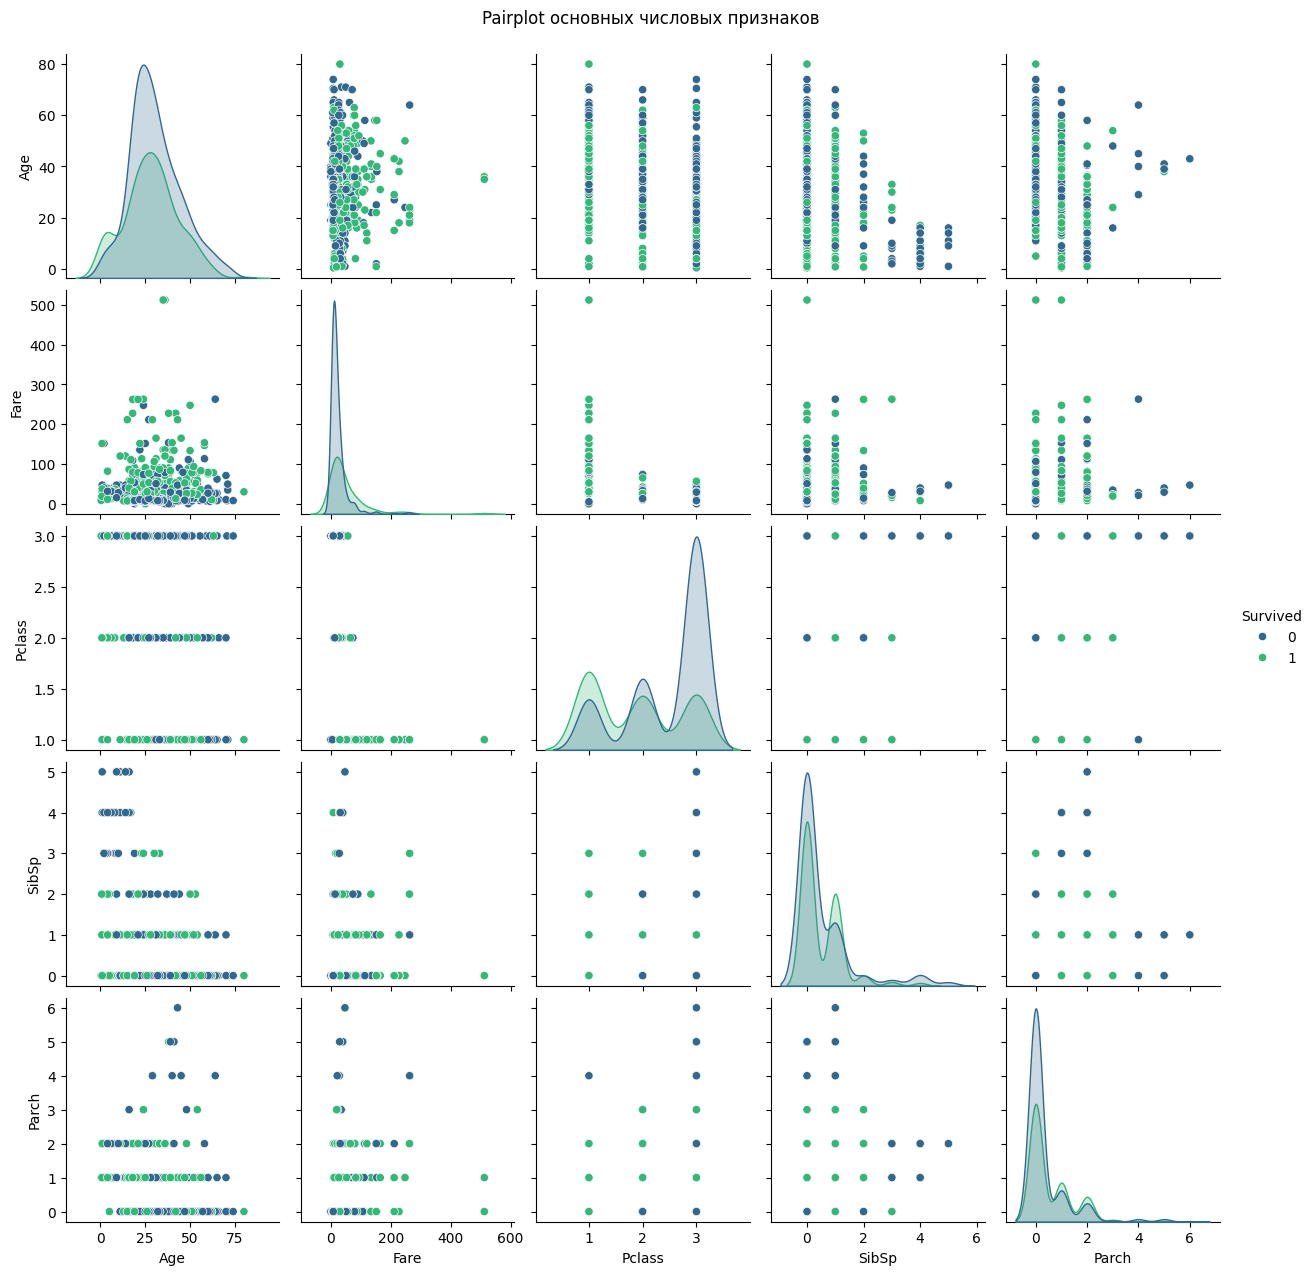


Зависимость Fare от Pclass (исходные данные):


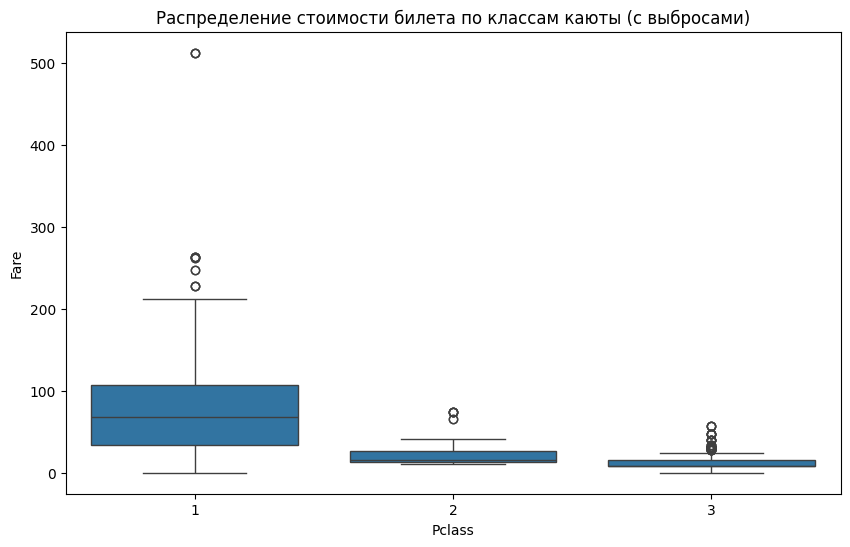


Зависимость Fare от Pclass (без выбросов):


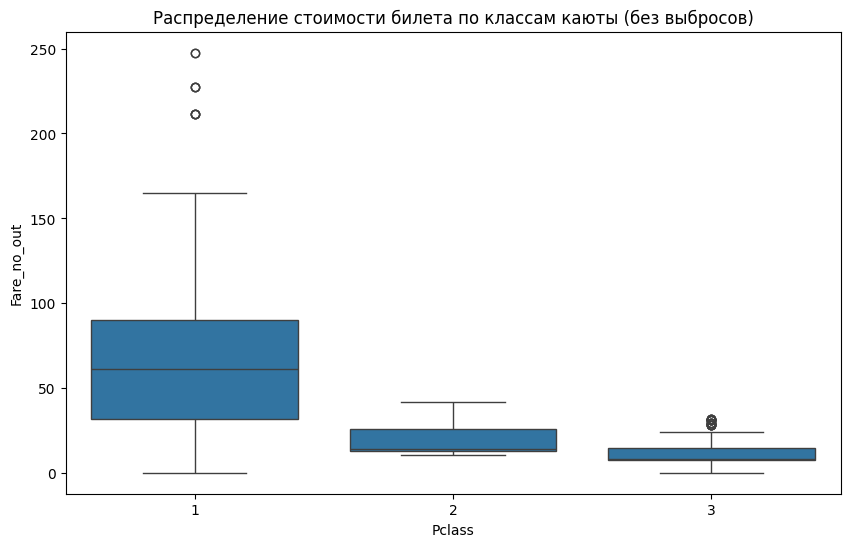


Соотношение выживших по полу:


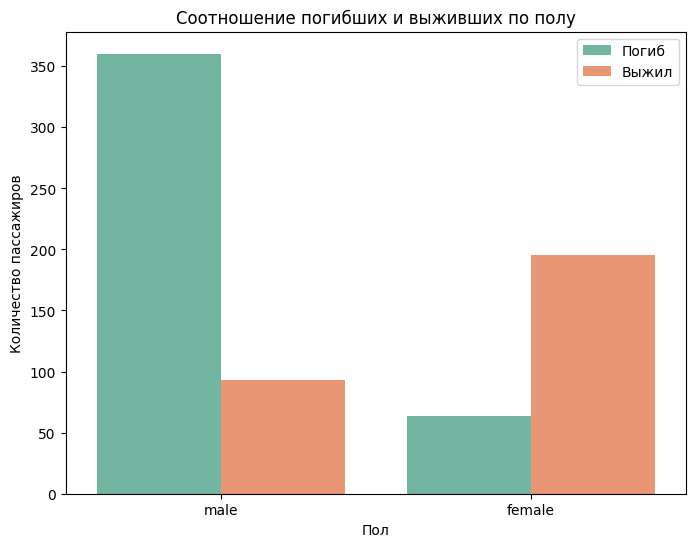


Соотношение выживших по классу каюты:


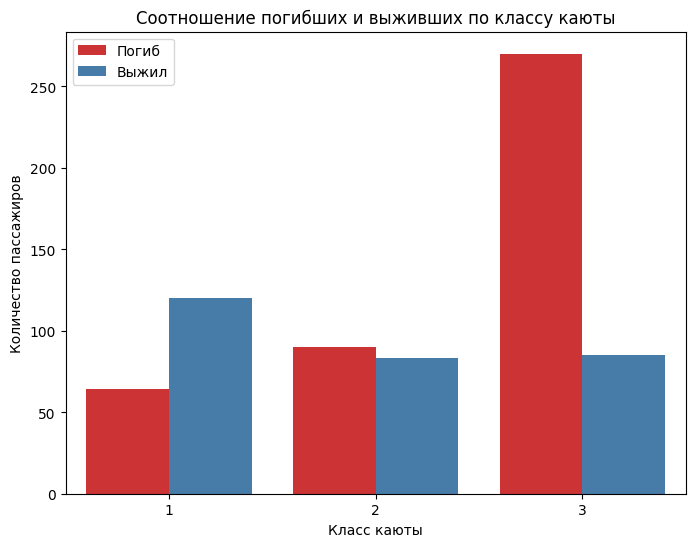


Зависимость выживания от возраста:


C:\Users\Administaror\AppData\Local\Temp\ipykernel_31676\731938770.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Survived', y='Age', palette='viridis')
C:\Users\Administaror\AppData\Local\Temp\ipykernel_31676\731938770.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = train_df.groupby('Age_Group')['Survived'].mean()


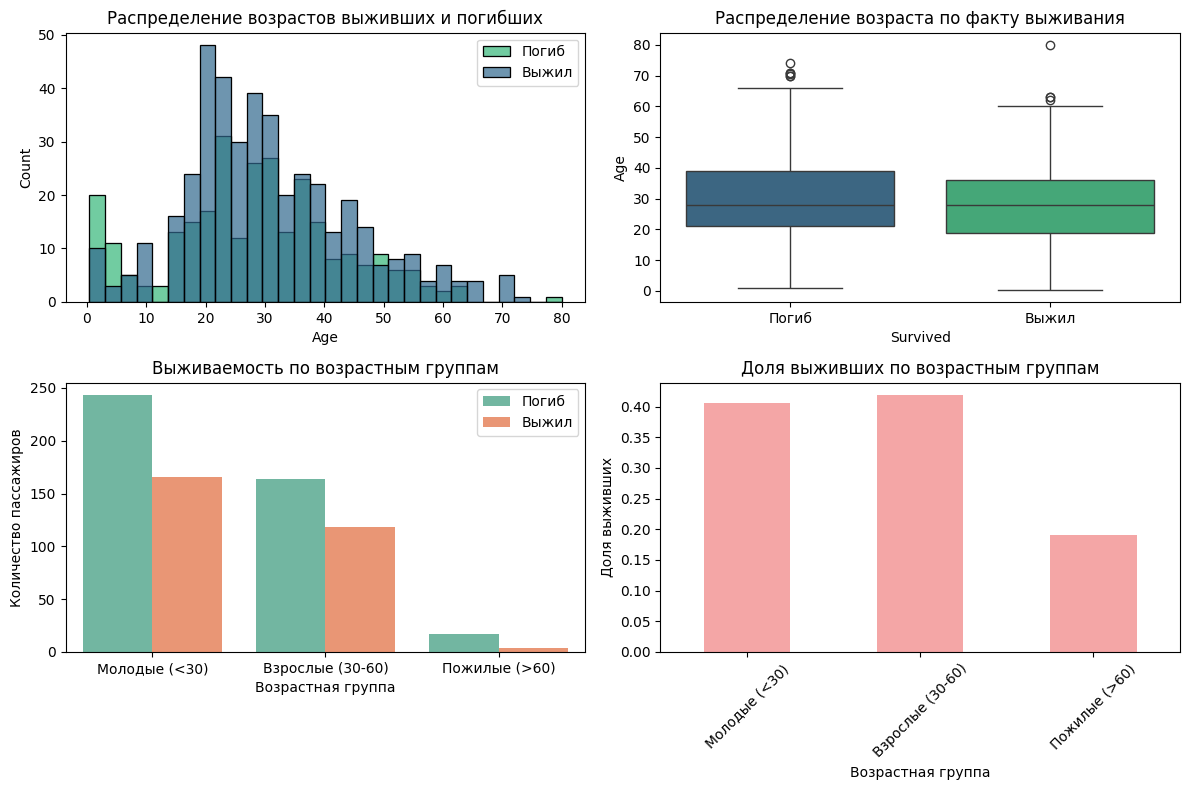


Статистика выживаемости по возрастным группам:
                  Всего  Выжило  Доля выживших
Age_Group                                     
Молодые (<30)       409     166       0.405868
Взрослые (30-60)    282     118       0.418440
Пожилые (>60)        21       4       0.190476

Дополнительные визуализации:


C:\Users\Administaror\AppData\Local\Temp\ipykernel_31676\731938770.py:120: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = train_df.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean'])


<Figure size 1000x600 with 0 Axes>

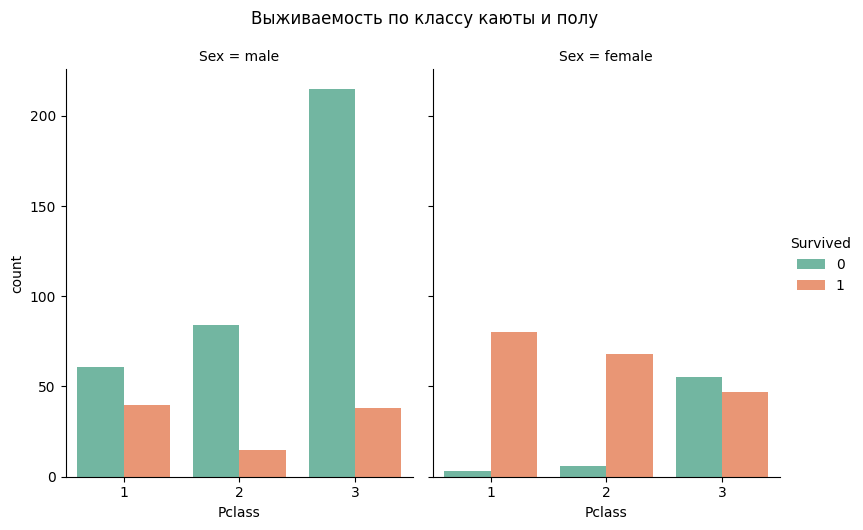

C:\Users\Administaror\AppData\Local\Temp\ipykernel_31676\731938770.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Survived', y='Fare_no_out', palette='viridis')
C:\Users\Administaror\AppData\Local\Temp\ipykernel_31676\731938770.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x='Survived', y='Fare_no_out', palette='viridis')


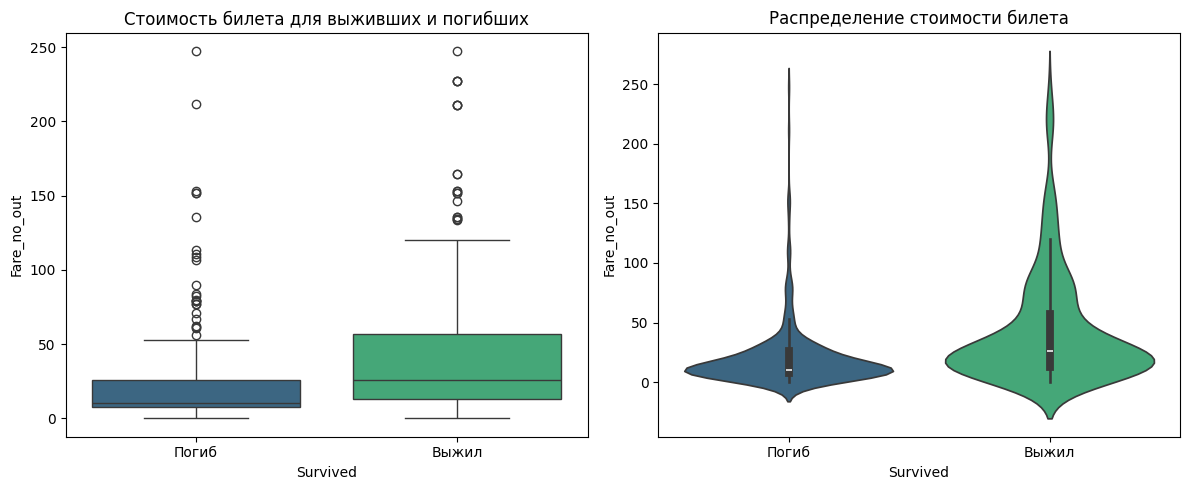

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Считываем обучающую выборку
train_df = pd.read_csv("titanic_train.csv", index_col='PassengerId') 
train_df.head(2)

# Выкинем признак Cabin, а потом – все строки, где есть пропуски
train_df = train_df.drop('Cabin', axis=1).dropna()

# 1. Попарные зависимости признаков
print("Попарные зависимости признаков:")
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']], 
             hue='Survived', palette='viridis')
plt.suptitle('Pairplot основных числовых признаков', y=1.02)
plt.show()

# 2. Зависимость платы за билет от класса каюты (исходный boxplot)
print("\nЗависимость Fare от Pclass (исходные данные):")
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Pclass', y='Fare')
plt.title('Распределение стоимости билета по классам каюты (с выбросами)')
plt.show()

# 3. Создание признака Fare_no_out без выбросов
train_df['Fare_no_out'] = train_df['Fare']

fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

# Исключаем выбросы (более 2 стандартных отклонений от средней)
def remove_outliers(series):
    mean = series.mean()
    std = series.std()
    return series[(series >= mean - 2*std) & (series <= mean + 2*std)]

fare_pclass1_no_out = remove_outliers(fare_pclass1)
fare_pclass2_no_out = remove_outliers(fare_pclass2)
fare_pclass3_no_out = remove_outliers(fare_pclass3)

# Обновляем признак Fare_no_out
train_df['Fare_no_out'] = pd.concat([fare_pclass1_no_out, fare_pclass2_no_out, fare_pclass3_no_out])

# Boxplot без выбросов
print("\nЗависимость Fare от Pclass (без выбросов):")
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Pclass', y='Fare_no_out')
plt.title('Распределение стоимости билета по классам каюты (без выбросов)')
plt.show()

# 4. Соотношение погибших и выживших в зависимости от пола
print("\nСоотношение выживших по полу:")
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Set2')
plt.title('Соотношение погибших и выживших по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.legend(['Погиб', 'Выжил'])
plt.show()

# 5. Соотношение погибших и выживших в зависимости от класса каюты
print("\nСоотношение выживших по классу каюты:")
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Соотношение погибших и выживших по классу каюты')
plt.xlabel('Класс каюты')
plt.ylabel('Количество пассажиров')
plt.legend(['Погиб', 'Выжил'])
plt.show()

# 6. Зависимость выживания от возраста
print("\nЗависимость выживания от возраста:")

# Создаем возрастные группы
train_df['Age_Group'] = pd.cut(train_df['Age'], 
                              bins=[0, 30, 60, 100], 
                              labels=['Молодые (<30)', 'Взрослые (30-60)', 'Пожилые (>60)'])

# График распределения возрастов выживших и погибших
plt.figure(figsize=(12, 8))

# Гистограмма распределения возрастов
plt.subplot(2, 2, 1)
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, alpha=0.7, palette='viridis')
plt.title('Распределение возрастов выживших и погибших')
plt.legend(['Погиб', 'Выжил'])

# Boxplot возрастов по выживанию
plt.subplot(2, 2, 2)
sns.boxplot(data=train_df, x='Survived', y='Age', palette='viridis')
plt.title('Распределение возраста по факту выживания')
plt.xticks([0, 1], ['Погиб', 'Выжил'])

# Количество выживших по возрастным группам
plt.subplot(2, 2, 3)
sns.countplot(data=train_df, x='Age_Group', hue='Survived', palette='Set2')
plt.title('Выживаемость по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пассажиров')
plt.legend(['Погиб', 'Выжил'])

# Доля выживших по возрастным группам
plt.subplot(2, 2, 4)
age_group_survival = train_df.groupby('Age_Group')['Survived'].mean()
age_group_survival.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Доля выживших по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Доля выживших')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Статистика по выживанию в разных возрастных группах
print("\nСтатистика выживаемости по возрастным группам:")
age_stats = train_df.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean'])
age_stats.columns = ['Всего', 'Выжило', 'Доля выживших']
print(age_stats)

# Дополнительные визуализации
print("\nДополнительные визуализации:")

# Зависимость выживания от пола и класса
plt.figure(figsize=(10, 6))
sns.catplot(data=train_df, x='Pclass', hue='Survived', col='Sex', kind='count', 
            palette='Set2', height=5, aspect=0.8)
plt.suptitle('Выживаемость по классу каюты и полу', y=1.05)
plt.show()

# Распределение стоимости билета для выживших и погибших
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=train_df, x='Survived', y='Fare_no_out', palette='viridis')
plt.title('Стоимость билета для выживших и погибших')
plt.xticks([0, 1], ['Погиб', 'Выжил'])

plt.subplot(1, 2, 2)
sns.violinplot(data=train_df, x='Survived', y='Fare_no_out', palette='viridis')
plt.title('Распределение стоимости билета')
plt.xticks([0, 1], ['Погиб', 'Выжил'])

plt.tight_layout()
plt.show()